## Loading Packages

In [12]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt


import sys
sys.path.append(r'../../../')
from Model.utils import replace_extreme_values, rotate_spatial_coordinates

## Visualization of "Background noise"

Background noise of replicate 1


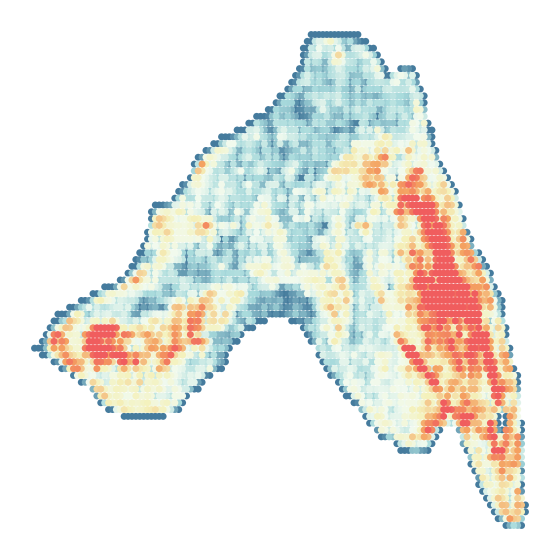

Background noise of replicate 2


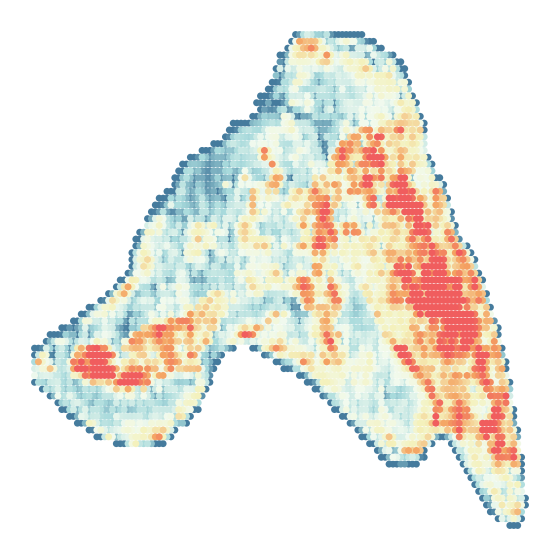

Background noise of replicate 3


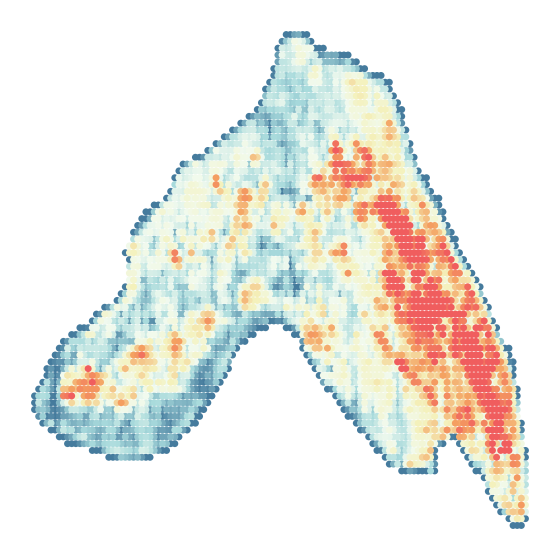

In [30]:
# Define replicate numbers
replicates = ['1', '2', '3']

# Define the color map
colors = ["#457b9d", "#a8dadc", "#f1faee", "#f4f1bb", "#f4a261", "#f05d5e"]
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("my_cmap", colors)

# Set plotting parameters
plt.rcParams['font.size'] = 20
plt.rcParams['font.sans-serif'] = 'Arial'

# Loop through each replicate
for replicate in replicates:
    # Load the data
    adata_modality_1 = sc.read_h5ad(f"../../../Data/Mouse_Thymus_{replicate}/adata_RNA.h5ad")
    print(f"Background noise of replicate {replicate}")
    # If it is the third replicate, rotate the coordinates by 90 degrees
    if replicate == '3':
        adata_modality_1.obsm['spatial'] = rotate_spatial_coordinates(adata_modality_1.obsm['spatial'], angle_degrees=270)

    # Calculate background noise
    adata_modality_1.obs['background'] = np.sum(adata_modality_1.X.toarray(), axis=1).ravel()
    adata_modality_1.obs['background'] = replace_extreme_values(adata_modality_1.obs['background'], n=0.05)
    
    # Create the plot
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    
    # Plot the spatial embedding
    sc.pl.embedding(adata_modality_1, basis="spatial", color='background', ax=ax, show=False, cmap=cmap, colorbar_loc=None, s=100)
    
    # Customize the plot
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'')  # Empty title
    ax.invert_yaxis()
    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    # Save the plot
    plt.savefig(f'replicate{replicate}/Background_Noise.png', dpi=500)
    plt.savefig(f'replicate{replicate}/Background_Noise.eps')

    plt.show()

## Visualization of Extracted Features

Extracted feature of replicate 1


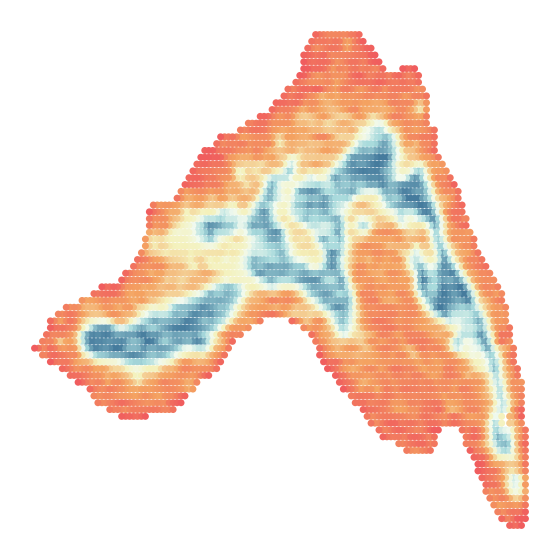

Extracted feature of replicate 2


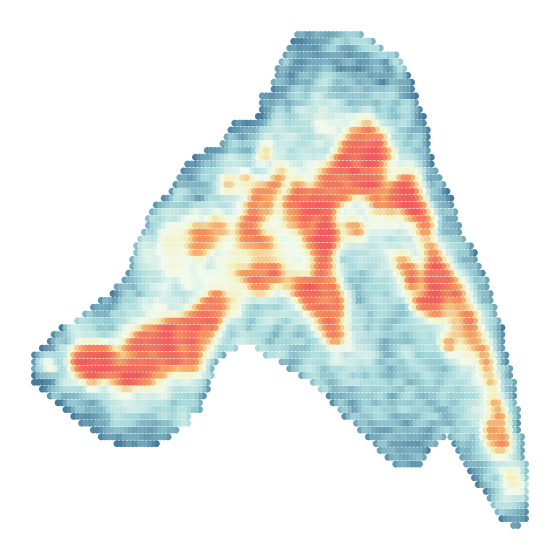

Extracted feature of replicate 3


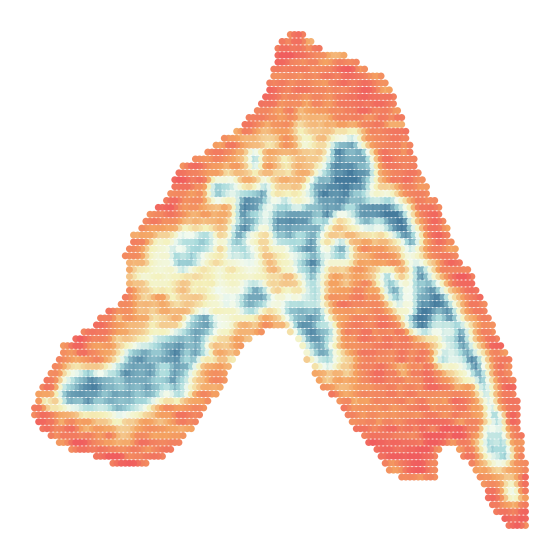

In [29]:
# Define replicate numbers
replicates = ['1', '2', '3']

# Define colors for the colormap
colors = ["#457b9d", "#a8dadc", "#f1faee", "#f4f1bb", "#f4a261", "#f05d5e"]
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("my_cmap", colors)

# Loop through each replicate and create a separate plot
for replicate in replicates:
    # Read the data for the current replicate
    adata_analysis = sc.read_h5ad(f"../../Mouse_Thymus_Replicate{replicate}.h5ad")
    componts_num = 0
    adata_analysis.obs[f'feat_{componts_num}'] = adata_analysis.obsm["SpaKnit"][:, 0]
    adata_analysis.obs[f'feat_{componts_num}'] = replace_extreme_values(adata_analysis.obs[f'feat_{componts_num}'], n=0.005)

    print(f"Extracted feature of replicate {replicate}")
    # Set up the figure and axis for the current plot
    plt.rcParams['font.size'] = 20
    plt.rcParams['font.sans-serif'] = 'Arial'
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

    # Plot the spatial embedding with the extracted feature
    sc.pl.embedding(adata_analysis, basis="spatial", color=f'feat_{componts_num}', ax=ax, show=False, cmap=cmap, colorbar_loc=None, s=100)

    # Customize the plot
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'')
    ax.invert_yaxis()
    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    plt.savefig(f'replicate{replicate}/Extracted_Feature.png', dpi=500)
    plt.savefig(f'replicate{replicate}/Extracted_Feature.eps')

    plt.show()